In [1]:
#!pip install scikit-learn

In [2]:
import pandas as pd
import sklearn
import sklearn.model_selection
# from autoPyTorch.api.tabular_classification import TabularClassificationTask
#from autoPyTorch.api.tabular_regression import TabularRegressionTask
from matplotlib import pyplot as plt
import numpy as np
#from torch import nn, optim
#import torch
#import torch.nn.functional as F
import catboost

In [33]:
!ls ../src/josh_test/data/

catboost_ephesians_train.cbm	NA27-CUVMP-manual.json
chinese_compiled_stats.ods	NA27-CUVMP-manual-Wordmap.json
compiled_stats.ods		NA27-YLT-manual.json
dump_training_data_chinese.csv	NA27-YLT-manual-Wordmap.json
el-en.xml			sources
el-en.xml.gz			targets
mappings-GNT-stripped.tsv


In [24]:
#Greek to English
input_csv_name = "../src/josh_test/data/dump_training_data.csv"
cb_output_model_name = "../src/josh_test/results/tenth_of_nt.cbm"
xg_output_model_name = "../src/josh_test/results/tenth_of_nt_xgboost.json"

#Greek to Chinese
# input_csv_name = "../src/josh_test/data/dump_training_data_chinese.csv"
# cb_output_model_name = "../src/josh_test/results/tenth_of_nt_chinese.cbm"
# xg_output_model_name = "../src/josh_test/results/tenth_of_nt_chinese_xgboost.json"

In [5]:
# with open( input_csv_name, 'r' ) as csv_in:
#     data_string = csv_in.read()

In [6]:
# data_rows = data_string.split( '\n' )
# data_rows_cols = [data_row.split(",") for data_row in data_rows if len(data_row) > 0]
# data_rows_cols = [x[:len(data_rows_cols[0])] for x in data_rows_cols]
# data = pd.DataFrame(data_rows_cols[1:], columns=data_rows_cols[0])

In [7]:
data = pd.read_csv( input_csv_name )

In [8]:
y = data.output
X = data.loc[:,data.columns[5:]]
#y[0] = .999 #This is a hack so that the regressor doesn't think this is state data.

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    random_state=1,
)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [9]:
X_train.head()

,sourceCorpusPermutationsFrequencyRatio,targetCorpusPermutationsFrequencyRatio,sourceAlignmentMemoryFrequencyRatio,targetAlignmentMemoryFrequencyRatio,frequencyRatioCorpusFiltered,frequencyRatioAlignmentMemoryFiltered,sourceCorpusLemmaPermutationsFrequencyRatio,targetCorpusLemmaPermutationsFrequencyRatio,sourceAlignmentMemoryLemmaFrequencyRatio,targetAlignmentMemoryLemmaFrequencyRatio,...,alignmentRelativeOccurrence,alignmentPosition,phrasePlausibility,lemmaPhrasePlausibility,ngramLength,characterLength,alignmentOccurrences,lemmaAlignmentOccurrences,uniqueness,lemmaUniqueness
0,0.000284,0.007407,0,0,1.0,0,0.0,0.0,0,0,...,1.0,0.776216,0.033311,0,0.931129,0.883554,1.0,0,1.109621e-03,0
1,0.000012,0.051282,0,0,0.5,0,0.0,0.0,0,0,...,0.0,0.966346,0.000371,0,0.789304,0.626470,0.5,0,1.378057e-07,0
2,0.014925,0.000170,0,0,0.5,0,0.0,0.0,0,0,...,0.0,0.534759,0.012829,0,0.941055,0.603140,0.5,0,1.645863e-04,0
3,0.003595,0.004975,0,0,1.0,0,0.0,0.0,0,0,...,1.0,0.387500,0.749497,0,0.981752,0.843450,1.0,0,5.617456e-01,0
4,0.030457,0.000096,0,0,0.5,0,0.0,0.0,0,0,...,0.0,0.517500,0.002492,0,0.695584,0.710691,0.5,0,6.207852e-06,0


In [10]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: output, dtype: int64

In [11]:
from catboost import CatBoostRegressor, Pool

In [12]:
train_pool = Pool(
    data=X_train,
    label=y_train
)
validation_pool = Pool(
    data=X_test,
    label=y_test
)

In [13]:
cb_model = CatBoostRegressor(
    iterations=2000,
    #task_type="GPU",
    learning_rate=.03
)
cb_model.fit(train_pool, eval_set=validation_pool, verbose=True, plot=True)

print( 'Model is fitted: {}',format(cb_model.is_fitted()))
print('Model params:\n{}'.format(cb_model.get_params()))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0545903	test: 0.0527974	best: 0.0527974 (0)	total: 73.6ms	remaining: 2m 27s
1:	learn: 0.0542589	test: 0.0524712	best: 0.0524712 (1)	total: 91.4ms	remaining: 1m 31s
2:	learn: 0.0539346	test: 0.0521505	best: 0.0521505 (2)	total: 105ms	remaining: 1m 9s
3:	learn: 0.0536263	test: 0.0518794	best: 0.0518794 (3)	total: 120ms	remaining: 1m
4:	learn: 0.0533292	test: 0.0516064	best: 0.0516064 (4)	total: 170ms	remaining: 1m 7s
5:	learn: 0.0529055	test: 0.0512075	best: 0.0512075 (5)	total: 190ms	remaining: 1m 3s
6:	learn: 0.0526256	test: 0.0509516	best: 0.0509516 (6)	total: 210ms	remaining: 59.9s
7:	learn: 0.0523860	test: 0.0507189	best: 0.0507189 (7)	total: 228ms	remaining: 56.8s
8:	learn: 0.0521401	test: 0.0505060	best: 0.0505060 (8)	total: 244ms	remaining: 54.1s
9:	learn: 0.0518972	test: 0.0502851	best: 0.0502851 (9)	total: 259ms	remaining: 51.5s
10:	learn: 0.0515109	test: 0.0499278	best: 0.0499278 (10)	total: 279ms	remaining: 50.4s
11:	learn: 0.0512967	test: 0.0497280	best: 0.049728

102:	learn: 0.0421971	test: 0.0416966	best: 0.0416966 (102)	total: 1.78s	remaining: 32.9s
103:	learn: 0.0421686	test: 0.0416773	best: 0.0416773 (103)	total: 1.8s	remaining: 32.9s
104:	learn: 0.0421441	test: 0.0416604	best: 0.0416604 (104)	total: 1.83s	remaining: 33s
105:	learn: 0.0421096	test: 0.0416406	best: 0.0416406 (105)	total: 1.84s	remaining: 32.9s
106:	learn: 0.0420990	test: 0.0416278	best: 0.0416278 (106)	total: 1.85s	remaining: 32.8s
107:	learn: 0.0420829	test: 0.0416065	best: 0.0416065 (107)	total: 1.87s	remaining: 32.7s
108:	learn: 0.0420735	test: 0.0416005	best: 0.0416005 (108)	total: 1.88s	remaining: 32.6s
109:	learn: 0.0420493	test: 0.0415889	best: 0.0415889 (109)	total: 1.9s	remaining: 32.6s
110:	learn: 0.0420389	test: 0.0415817	best: 0.0415817 (110)	total: 1.91s	remaining: 32.5s
111:	learn: 0.0420252	test: 0.0415727	best: 0.0415727 (111)	total: 1.93s	remaining: 32.5s
112:	learn: 0.0419844	test: 0.0415368	best: 0.0415368 (112)	total: 1.95s	remaining: 32.6s
113:	learn: 0.

205:	learn: 0.0405457	test: 0.0404294	best: 0.0404294 (205)	total: 3.24s	remaining: 28.2s
206:	learn: 0.0405369	test: 0.0404272	best: 0.0404272 (206)	total: 3.25s	remaining: 28.2s
207:	learn: 0.0405249	test: 0.0404193	best: 0.0404193 (207)	total: 3.27s	remaining: 28.2s
208:	learn: 0.0405164	test: 0.0404101	best: 0.0404101 (208)	total: 3.28s	remaining: 28.1s
209:	learn: 0.0405078	test: 0.0404034	best: 0.0404034 (209)	total: 3.3s	remaining: 28.1s
210:	learn: 0.0404962	test: 0.0404006	best: 0.0404006 (210)	total: 3.31s	remaining: 28.1s
211:	learn: 0.0404882	test: 0.0403952	best: 0.0403952 (211)	total: 3.33s	remaining: 28.1s
212:	learn: 0.0404805	test: 0.0403934	best: 0.0403934 (212)	total: 3.35s	remaining: 28.1s
213:	learn: 0.0404760	test: 0.0403908	best: 0.0403908 (213)	total: 3.36s	remaining: 28s
214:	learn: 0.0404683	test: 0.0403871	best: 0.0403871 (214)	total: 3.37s	remaining: 28s
215:	learn: 0.0404550	test: 0.0403729	best: 0.0403729 (215)	total: 3.39s	remaining: 28s
216:	learn: 0.040

308:	learn: 0.0397101	test: 0.0399174	best: 0.0399174 (307)	total: 4.68s	remaining: 25.6s
309:	learn: 0.0397033	test: 0.0399148	best: 0.0399148 (309)	total: 4.69s	remaining: 25.6s
310:	learn: 0.0396918	test: 0.0399118	best: 0.0399118 (310)	total: 4.71s	remaining: 25.6s
311:	learn: 0.0396875	test: 0.0399110	best: 0.0399110 (311)	total: 4.72s	remaining: 25.6s
312:	learn: 0.0396705	test: 0.0398985	best: 0.0398985 (312)	total: 4.74s	remaining: 25.5s
313:	learn: 0.0396603	test: 0.0398934	best: 0.0398934 (313)	total: 4.75s	remaining: 25.5s
314:	learn: 0.0396553	test: 0.0398953	best: 0.0398934 (313)	total: 4.77s	remaining: 25.5s
315:	learn: 0.0396418	test: 0.0398847	best: 0.0398847 (315)	total: 4.79s	remaining: 25.5s
316:	learn: 0.0396378	test: 0.0398846	best: 0.0398846 (316)	total: 4.81s	remaining: 25.5s
317:	learn: 0.0396337	test: 0.0398821	best: 0.0398821 (317)	total: 4.82s	remaining: 25.5s
318:	learn: 0.0396314	test: 0.0398818	best: 0.0398818 (318)	total: 4.84s	remaining: 25.5s
319:	learn

406:	learn: 0.0390642	test: 0.0395320	best: 0.0395316 (405)	total: 6.15s	remaining: 24.1s
407:	learn: 0.0390560	test: 0.0395241	best: 0.0395241 (407)	total: 6.17s	remaining: 24.1s
408:	learn: 0.0390497	test: 0.0395234	best: 0.0395234 (408)	total: 6.18s	remaining: 24.1s
409:	learn: 0.0390429	test: 0.0395182	best: 0.0395182 (409)	total: 6.2s	remaining: 24s
410:	learn: 0.0390408	test: 0.0395181	best: 0.0395181 (410)	total: 6.21s	remaining: 24s
411:	learn: 0.0390350	test: 0.0395170	best: 0.0395170 (411)	total: 6.23s	remaining: 24s
412:	learn: 0.0390196	test: 0.0395031	best: 0.0395031 (412)	total: 6.25s	remaining: 24s
413:	learn: 0.0390141	test: 0.0395026	best: 0.0395026 (413)	total: 6.27s	remaining: 24s
414:	learn: 0.0390096	test: 0.0394964	best: 0.0394964 (414)	total: 6.29s	remaining: 24s
415:	learn: 0.0389981	test: 0.0394906	best: 0.0394906 (415)	total: 6.31s	remaining: 24s
416:	learn: 0.0389954	test: 0.0394898	best: 0.0394898 (416)	total: 6.34s	remaining: 24.1s
417:	learn: 0.0389914	tes

507:	learn: 0.0385920	test: 0.0393374	best: 0.0393370 (506)	total: 7.58s	remaining: 22.3s
508:	learn: 0.0385893	test: 0.0393360	best: 0.0393360 (508)	total: 7.59s	remaining: 22.2s
509:	learn: 0.0385883	test: 0.0393360	best: 0.0393360 (508)	total: 7.61s	remaining: 22.2s
510:	learn: 0.0385824	test: 0.0393318	best: 0.0393318 (510)	total: 7.62s	remaining: 22.2s
511:	learn: 0.0385775	test: 0.0393316	best: 0.0393316 (511)	total: 7.63s	remaining: 22.2s
512:	learn: 0.0385747	test: 0.0393330	best: 0.0393316 (511)	total: 7.64s	remaining: 22.2s
513:	learn: 0.0385693	test: 0.0393291	best: 0.0393291 (513)	total: 7.66s	remaining: 22.1s
514:	learn: 0.0385630	test: 0.0393298	best: 0.0393291 (513)	total: 7.67s	remaining: 22.1s
515:	learn: 0.0385606	test: 0.0393310	best: 0.0393291 (513)	total: 7.68s	remaining: 22.1s
516:	learn: 0.0385583	test: 0.0393323	best: 0.0393291 (513)	total: 7.69s	remaining: 22.1s
517:	learn: 0.0385544	test: 0.0393297	best: 0.0393291 (513)	total: 7.71s	remaining: 22s
518:	learn: 

599:	learn: 0.0382875	test: 0.0392860	best: 0.0392843 (596)	total: 8.84s	remaining: 20.6s
600:	learn: 0.0382815	test: 0.0392859	best: 0.0392843 (596)	total: 8.86s	remaining: 20.6s
601:	learn: 0.0382798	test: 0.0392881	best: 0.0392843 (596)	total: 8.88s	remaining: 20.6s
602:	learn: 0.0382778	test: 0.0392898	best: 0.0392843 (596)	total: 8.89s	remaining: 20.6s
603:	learn: 0.0382722	test: 0.0392849	best: 0.0392843 (596)	total: 8.91s	remaining: 20.6s
604:	learn: 0.0382703	test: 0.0392865	best: 0.0392843 (596)	total: 8.92s	remaining: 20.6s
605:	learn: 0.0382693	test: 0.0392864	best: 0.0392843 (596)	total: 8.93s	remaining: 20.6s
606:	learn: 0.0382614	test: 0.0392852	best: 0.0392843 (596)	total: 8.95s	remaining: 20.5s
607:	learn: 0.0382559	test: 0.0392848	best: 0.0392843 (596)	total: 8.96s	remaining: 20.5s
608:	learn: 0.0382506	test: 0.0392801	best: 0.0392801 (608)	total: 8.98s	remaining: 20.5s
609:	learn: 0.0382489	test: 0.0392824	best: 0.0392801 (608)	total: 8.99s	remaining: 20.5s
610:	learn

702:	learn: 0.0379508	test: 0.0391741	best: 0.0391741 (702)	total: 10.4s	remaining: 19.2s
703:	learn: 0.0379467	test: 0.0391753	best: 0.0391741 (702)	total: 10.4s	remaining: 19.2s
704:	learn: 0.0379459	test: 0.0391754	best: 0.0391741 (702)	total: 10.5s	remaining: 19.2s
705:	learn: 0.0379445	test: 0.0391757	best: 0.0391741 (702)	total: 10.5s	remaining: 19.2s
706:	learn: 0.0379432	test: 0.0391760	best: 0.0391741 (702)	total: 10.5s	remaining: 19.2s
707:	learn: 0.0379400	test: 0.0391771	best: 0.0391741 (702)	total: 10.5s	remaining: 19.2s
708:	learn: 0.0379389	test: 0.0391785	best: 0.0391741 (702)	total: 10.5s	remaining: 19.1s
709:	learn: 0.0379380	test: 0.0391787	best: 0.0391741 (702)	total: 10.5s	remaining: 19.1s
710:	learn: 0.0379366	test: 0.0391807	best: 0.0391741 (702)	total: 10.5s	remaining: 19.1s
711:	learn: 0.0379357	test: 0.0391807	best: 0.0391741 (702)	total: 10.6s	remaining: 19.1s
712:	learn: 0.0379343	test: 0.0391828	best: 0.0391741 (702)	total: 10.6s	remaining: 19.1s
713:	learn

797:	learn: 0.0376390	test: 0.0390991	best: 0.0390991 (797)	total: 11.9s	remaining: 17.9s
798:	learn: 0.0376384	test: 0.0390989	best: 0.0390989 (798)	total: 11.9s	remaining: 17.9s
799:	learn: 0.0376349	test: 0.0390972	best: 0.0390972 (799)	total: 11.9s	remaining: 17.9s
800:	learn: 0.0376339	test: 0.0390981	best: 0.0390972 (799)	total: 11.9s	remaining: 17.9s
801:	learn: 0.0376269	test: 0.0390976	best: 0.0390972 (799)	total: 11.9s	remaining: 17.8s
802:	learn: 0.0376256	test: 0.0390978	best: 0.0390972 (799)	total: 12s	remaining: 17.8s
803:	learn: 0.0376192	test: 0.0390916	best: 0.0390916 (803)	total: 12s	remaining: 17.8s
804:	learn: 0.0376133	test: 0.0390911	best: 0.0390911 (804)	total: 12s	remaining: 17.8s
805:	learn: 0.0376123	test: 0.0390915	best: 0.0390911 (804)	total: 12s	remaining: 17.8s
806:	learn: 0.0376112	test: 0.0390909	best: 0.0390909 (806)	total: 12s	remaining: 17.8s
807:	learn: 0.0376102	test: 0.0390917	best: 0.0390909 (806)	total: 12s	remaining: 17.7s
808:	learn: 0.0376094	

896:	learn: 0.0373752	test: 0.0390344	best: 0.0390344 (896)	total: 13.3s	remaining: 16.4s
897:	learn: 0.0373743	test: 0.0390343	best: 0.0390343 (897)	total: 13.3s	remaining: 16.3s
898:	learn: 0.0373696	test: 0.0390318	best: 0.0390318 (898)	total: 13.3s	remaining: 16.3s
899:	learn: 0.0373675	test: 0.0390305	best: 0.0390305 (899)	total: 13.3s	remaining: 16.3s
900:	learn: 0.0373670	test: 0.0390293	best: 0.0390293 (900)	total: 13.4s	remaining: 16.3s
901:	learn: 0.0373653	test: 0.0390293	best: 0.0390293 (901)	total: 13.4s	remaining: 16.3s
902:	learn: 0.0373645	test: 0.0390292	best: 0.0390292 (902)	total: 13.4s	remaining: 16.3s
903:	learn: 0.0373638	test: 0.0390295	best: 0.0390292 (902)	total: 13.4s	remaining: 16.2s
904:	learn: 0.0373557	test: 0.0390280	best: 0.0390280 (904)	total: 13.4s	remaining: 16.2s
905:	learn: 0.0373552	test: 0.0390269	best: 0.0390269 (905)	total: 13.4s	remaining: 16.2s
906:	learn: 0.0373546	test: 0.0390258	best: 0.0390258 (906)	total: 13.4s	remaining: 16.2s
907:	learn

988:	learn: 0.0371465	test: 0.0389914	best: 0.0389914 (988)	total: 14.5s	remaining: 14.9s
989:	learn: 0.0371428	test: 0.0389903	best: 0.0389903 (989)	total: 14.6s	remaining: 14.8s
990:	learn: 0.0371419	test: 0.0389907	best: 0.0389903 (989)	total: 14.6s	remaining: 14.8s
991:	learn: 0.0371382	test: 0.0389878	best: 0.0389878 (991)	total: 14.6s	remaining: 14.8s
992:	learn: 0.0371318	test: 0.0389847	best: 0.0389847 (992)	total: 14.6s	remaining: 14.8s
993:	learn: 0.0371314	test: 0.0389838	best: 0.0389838 (993)	total: 14.6s	remaining: 14.8s
994:	learn: 0.0371302	test: 0.0389842	best: 0.0389838 (993)	total: 14.6s	remaining: 14.8s
995:	learn: 0.0371295	test: 0.0389843	best: 0.0389838 (993)	total: 14.6s	remaining: 14.8s
996:	learn: 0.0371287	test: 0.0389842	best: 0.0389838 (993)	total: 14.6s	remaining: 14.7s
997:	learn: 0.0371240	test: 0.0389851	best: 0.0389838 (993)	total: 14.7s	remaining: 14.7s
998:	learn: 0.0371210	test: 0.0389850	best: 0.0389838 (993)	total: 14.7s	remaining: 14.7s
999:	learn

1082:	learn: 0.0368705	test: 0.0389334	best: 0.0389331 (1081)	total: 16s	remaining: 13.6s
1083:	learn: 0.0368700	test: 0.0389334	best: 0.0389331 (1081)	total: 16s	remaining: 13.5s
1084:	learn: 0.0368694	test: 0.0389336	best: 0.0389331 (1081)	total: 16.1s	remaining: 13.5s
1085:	learn: 0.0368691	test: 0.0389327	best: 0.0389327 (1085)	total: 16.1s	remaining: 13.5s
1086:	learn: 0.0368683	test: 0.0389326	best: 0.0389326 (1086)	total: 16.1s	remaining: 13.5s
1087:	learn: 0.0368658	test: 0.0389317	best: 0.0389317 (1087)	total: 16.1s	remaining: 13.5s
1088:	learn: 0.0368597	test: 0.0389324	best: 0.0389317 (1087)	total: 16.1s	remaining: 13.5s
1089:	learn: 0.0368563	test: 0.0389330	best: 0.0389317 (1087)	total: 16.2s	remaining: 13.5s
1090:	learn: 0.0368558	test: 0.0389330	best: 0.0389317 (1087)	total: 16.2s	remaining: 13.5s
1091:	learn: 0.0368553	test: 0.0389330	best: 0.0389317 (1087)	total: 16.2s	remaining: 13.5s
1092:	learn: 0.0368547	test: 0.0389332	best: 0.0389317 (1087)	total: 16.2s	remaining

1183:	learn: 0.0365037	test: 0.0387886	best: 0.0387883 (1182)	total: 17.7s	remaining: 12.2s
1184:	learn: 0.0364993	test: 0.0387871	best: 0.0387871 (1184)	total: 17.7s	remaining: 12.2s
1185:	learn: 0.0364976	test: 0.0387882	best: 0.0387871 (1184)	total: 17.7s	remaining: 12.2s
1186:	learn: 0.0364957	test: 0.0387875	best: 0.0387871 (1184)	total: 17.7s	remaining: 12.1s
1187:	learn: 0.0364915	test: 0.0387875	best: 0.0387871 (1184)	total: 17.7s	remaining: 12.1s
1188:	learn: 0.0364818	test: 0.0387855	best: 0.0387855 (1188)	total: 17.8s	remaining: 12.1s
1189:	learn: 0.0364783	test: 0.0387838	best: 0.0387838 (1189)	total: 17.8s	remaining: 12.1s
1190:	learn: 0.0364772	test: 0.0387835	best: 0.0387835 (1190)	total: 17.8s	remaining: 12.1s
1191:	learn: 0.0364757	test: 0.0387836	best: 0.0387835 (1190)	total: 17.8s	remaining: 12.1s
1192:	learn: 0.0364728	test: 0.0387829	best: 0.0387829 (1192)	total: 17.8s	remaining: 12.1s
1193:	learn: 0.0364687	test: 0.0387827	best: 0.0387827 (1193)	total: 17.8s	remai

1285:	learn: 0.0362103	test: 0.0387517	best: 0.0387490 (1275)	total: 19.1s	remaining: 10.6s
1286:	learn: 0.0362097	test: 0.0387518	best: 0.0387490 (1275)	total: 19.1s	remaining: 10.6s
1287:	learn: 0.0362089	test: 0.0387519	best: 0.0387490 (1275)	total: 19.1s	remaining: 10.6s
1288:	learn: 0.0362081	test: 0.0387521	best: 0.0387490 (1275)	total: 19.2s	remaining: 10.6s
1289:	learn: 0.0362076	test: 0.0387521	best: 0.0387490 (1275)	total: 19.2s	remaining: 10.6s
1290:	learn: 0.0362074	test: 0.0387521	best: 0.0387490 (1275)	total: 19.2s	remaining: 10.5s
1291:	learn: 0.0362027	test: 0.0387520	best: 0.0387490 (1275)	total: 19.2s	remaining: 10.5s
1292:	learn: 0.0362023	test: 0.0387527	best: 0.0387490 (1275)	total: 19.2s	remaining: 10.5s
1293:	learn: 0.0362018	test: 0.0387528	best: 0.0387490 (1275)	total: 19.2s	remaining: 10.5s
1294:	learn: 0.0361996	test: 0.0387537	best: 0.0387490 (1275)	total: 19.3s	remaining: 10.5s
1295:	learn: 0.0361957	test: 0.0387521	best: 0.0387490 (1275)	total: 19.3s	remai

1376:	learn: 0.0359373	test: 0.0386793	best: 0.0386788 (1367)	total: 20.4s	remaining: 9.21s
1377:	learn: 0.0359297	test: 0.0386780	best: 0.0386780 (1377)	total: 20.4s	remaining: 9.2s
1378:	learn: 0.0359263	test: 0.0386765	best: 0.0386765 (1378)	total: 20.4s	remaining: 9.18s
1379:	learn: 0.0359227	test: 0.0386755	best: 0.0386755 (1379)	total: 20.4s	remaining: 9.17s
1380:	learn: 0.0359182	test: 0.0386728	best: 0.0386728 (1380)	total: 20.4s	remaining: 9.15s
1381:	learn: 0.0359143	test: 0.0386743	best: 0.0386728 (1380)	total: 20.4s	remaining: 9.14s
1382:	learn: 0.0359101	test: 0.0386728	best: 0.0386728 (1380)	total: 20.4s	remaining: 9.12s
1383:	learn: 0.0359064	test: 0.0386744	best: 0.0386728 (1380)	total: 20.5s	remaining: 9.11s
1384:	learn: 0.0359028	test: 0.0386746	best: 0.0386728 (1380)	total: 20.5s	remaining: 9.09s
1385:	learn: 0.0359004	test: 0.0386742	best: 0.0386728 (1380)	total: 20.5s	remaining: 9.08s
1386:	learn: 0.0358984	test: 0.0386746	best: 0.0386728 (1380)	total: 20.5s	remain

1480:	learn: 0.0355882	test: 0.0385776	best: 0.0385775 (1479)	total: 22.1s	remaining: 7.73s
1481:	learn: 0.0355876	test: 0.0385778	best: 0.0385775 (1479)	total: 22.1s	remaining: 7.71s
1482:	learn: 0.0355858	test: 0.0385791	best: 0.0385775 (1479)	total: 22.1s	remaining: 7.7s
1483:	learn: 0.0355839	test: 0.0385791	best: 0.0385775 (1479)	total: 22.1s	remaining: 7.68s
1484:	learn: 0.0355816	test: 0.0385794	best: 0.0385775 (1479)	total: 22.1s	remaining: 7.67s
1485:	learn: 0.0355764	test: 0.0385805	best: 0.0385775 (1479)	total: 22.1s	remaining: 7.65s
1486:	learn: 0.0355760	test: 0.0385803	best: 0.0385775 (1479)	total: 22.1s	remaining: 7.64s
1487:	learn: 0.0355756	test: 0.0385804	best: 0.0385775 (1479)	total: 22.2s	remaining: 7.63s
1488:	learn: 0.0355751	test: 0.0385804	best: 0.0385775 (1479)	total: 22.2s	remaining: 7.61s
1489:	learn: 0.0355746	test: 0.0385808	best: 0.0385775 (1479)	total: 22.2s	remaining: 7.6s
1490:	learn: 0.0355741	test: 0.0385809	best: 0.0385775 (1479)	total: 22.2s	remaini

1583:	learn: 0.0353857	test: 0.0385743	best: 0.0385707 (1548)	total: 23.5s	remaining: 6.17s
1584:	learn: 0.0353852	test: 0.0385748	best: 0.0385707 (1548)	total: 23.5s	remaining: 6.16s
1585:	learn: 0.0353847	test: 0.0385750	best: 0.0385707 (1548)	total: 23.5s	remaining: 6.14s
1586:	learn: 0.0353835	test: 0.0385749	best: 0.0385707 (1548)	total: 23.6s	remaining: 6.13s
1587:	learn: 0.0353784	test: 0.0385740	best: 0.0385707 (1548)	total: 23.6s	remaining: 6.12s
1588:	learn: 0.0353718	test: 0.0385729	best: 0.0385707 (1548)	total: 23.6s	remaining: 6.1s
1589:	learn: 0.0353710	test: 0.0385732	best: 0.0385707 (1548)	total: 23.6s	remaining: 6.09s
1590:	learn: 0.0353705	test: 0.0385735	best: 0.0385707 (1548)	total: 23.6s	remaining: 6.07s
1591:	learn: 0.0353695	test: 0.0385736	best: 0.0385707 (1548)	total: 23.6s	remaining: 6.06s
1592:	learn: 0.0353690	test: 0.0385738	best: 0.0385707 (1548)	total: 23.6s	remaining: 6.04s
1593:	learn: 0.0353687	test: 0.0385738	best: 0.0385707 (1548)	total: 23.7s	remain

1686:	learn: 0.0351592	test: 0.0385440	best: 0.0385404 (1677)	total: 25s	remaining: 4.63s
1687:	learn: 0.0351588	test: 0.0385443	best: 0.0385404 (1677)	total: 25s	remaining: 4.62s
1688:	learn: 0.0351583	test: 0.0385446	best: 0.0385404 (1677)	total: 25s	remaining: 4.6s
1689:	learn: 0.0351540	test: 0.0385465	best: 0.0385404 (1677)	total: 25s	remaining: 4.59s
1690:	learn: 0.0351536	test: 0.0385468	best: 0.0385404 (1677)	total: 25s	remaining: 4.57s
1691:	learn: 0.0351531	test: 0.0385471	best: 0.0385404 (1677)	total: 25s	remaining: 4.56s
1692:	learn: 0.0351527	test: 0.0385475	best: 0.0385404 (1677)	total: 25s	remaining: 4.54s
1693:	learn: 0.0351515	test: 0.0385476	best: 0.0385404 (1677)	total: 25.1s	remaining: 4.53s
1694:	learn: 0.0351511	test: 0.0385479	best: 0.0385404 (1677)	total: 25.1s	remaining: 4.51s
1695:	learn: 0.0351505	test: 0.0385472	best: 0.0385404 (1677)	total: 25.1s	remaining: 4.5s
1696:	learn: 0.0351494	test: 0.0385475	best: 0.0385404 (1677)	total: 25.1s	remaining: 4.48s
1697

1787:	learn: 0.0349743	test: 0.0385391	best: 0.0385377 (1784)	total: 26.4s	remaining: 3.13s
1788:	learn: 0.0349739	test: 0.0385393	best: 0.0385377 (1784)	total: 26.4s	remaining: 3.12s
1789:	learn: 0.0349735	test: 0.0385393	best: 0.0385377 (1784)	total: 26.5s	remaining: 3.1s
1790:	learn: 0.0349708	test: 0.0385385	best: 0.0385377 (1784)	total: 26.5s	remaining: 3.09s
1791:	learn: 0.0349662	test: 0.0385357	best: 0.0385357 (1791)	total: 26.5s	remaining: 3.08s
1792:	learn: 0.0349660	test: 0.0385351	best: 0.0385351 (1792)	total: 26.5s	remaining: 3.06s
1793:	learn: 0.0349606	test: 0.0385322	best: 0.0385322 (1793)	total: 26.5s	remaining: 3.05s
1794:	learn: 0.0349603	test: 0.0385318	best: 0.0385318 (1794)	total: 26.5s	remaining: 3.03s
1795:	learn: 0.0349598	test: 0.0385315	best: 0.0385315 (1795)	total: 26.6s	remaining: 3.02s
1796:	learn: 0.0349561	test: 0.0385314	best: 0.0385314 (1796)	total: 26.6s	remaining: 3s
1797:	learn: 0.0349526	test: 0.0385305	best: 0.0385305 (1797)	total: 26.6s	remaining

1879:	learn: 0.0347698	test: 0.0385151	best: 0.0385151 (1879)	total: 27.9s	remaining: 1.78s
1880:	learn: 0.0347696	test: 0.0385153	best: 0.0385151 (1879)	total: 27.9s	remaining: 1.76s
1881:	learn: 0.0347682	test: 0.0385157	best: 0.0385151 (1879)	total: 27.9s	remaining: 1.75s
1882:	learn: 0.0347656	test: 0.0385148	best: 0.0385148 (1882)	total: 27.9s	remaining: 1.74s
1883:	learn: 0.0347618	test: 0.0385143	best: 0.0385143 (1883)	total: 28s	remaining: 1.72s
1884:	learn: 0.0347594	test: 0.0385144	best: 0.0385143 (1883)	total: 28s	remaining: 1.71s
1885:	learn: 0.0347566	test: 0.0385133	best: 0.0385133 (1885)	total: 28s	remaining: 1.69s
1886:	learn: 0.0347556	test: 0.0385133	best: 0.0385133 (1886)	total: 28s	remaining: 1.68s
1887:	learn: 0.0347555	test: 0.0385134	best: 0.0385133 (1886)	total: 28s	remaining: 1.66s
1888:	learn: 0.0347553	test: 0.0385135	best: 0.0385133 (1886)	total: 28s	remaining: 1.65s
1889:	learn: 0.0347537	test: 0.0385133	best: 0.0385133 (1889)	total: 28s	remaining: 1.63s
18

1973:	learn: 0.0345851	test: 0.0385026	best: 0.0384996 (1952)	total: 29.3s	remaining: 387ms
1974:	learn: 0.0345809	test: 0.0385028	best: 0.0384996 (1952)	total: 29.4s	remaining: 372ms
1975:	learn: 0.0345808	test: 0.0385033	best: 0.0384996 (1952)	total: 29.4s	remaining: 357ms
1976:	learn: 0.0345720	test: 0.0384979	best: 0.0384979 (1976)	total: 29.4s	remaining: 342ms
1977:	learn: 0.0345711	test: 0.0384981	best: 0.0384979 (1976)	total: 29.4s	remaining: 327ms
1978:	learn: 0.0345694	test: 0.0384981	best: 0.0384979 (1976)	total: 29.4s	remaining: 312ms
1979:	learn: 0.0345640	test: 0.0384922	best: 0.0384922 (1979)	total: 29.4s	remaining: 297ms
1980:	learn: 0.0345624	test: 0.0384923	best: 0.0384922 (1979)	total: 29.5s	remaining: 283ms
1981:	learn: 0.0345608	test: 0.0384923	best: 0.0384922 (1979)	total: 29.5s	remaining: 268ms
1982:	learn: 0.0345582	test: 0.0384890	best: 0.0384890 (1982)	total: 29.5s	remaining: 253ms
1983:	learn: 0.0345574	test: 0.0384891	best: 0.0384890 (1982)	total: 29.5s	remai

In [14]:
X.head()

,sourceCorpusPermutationsFrequencyRatio,targetCorpusPermutationsFrequencyRatio,sourceAlignmentMemoryFrequencyRatio,targetAlignmentMemoryFrequencyRatio,frequencyRatioCorpusFiltered,frequencyRatioAlignmentMemoryFiltered,sourceCorpusLemmaPermutationsFrequencyRatio,targetCorpusLemmaPermutationsFrequencyRatio,sourceAlignmentMemoryLemmaFrequencyRatio,targetAlignmentMemoryLemmaFrequencyRatio,...,alignmentRelativeOccurrence,alignmentPosition,phrasePlausibility,lemmaPhrasePlausibility,ngramLength,characterLength,alignmentOccurrences,lemmaAlignmentOccurrences,uniqueness,lemmaUniqueness
0,0.029412,0.023810,0,0,1.000000,0,0.0,0.0,0,0,...,1.0,0.363636,0.749497,0,0.363265,0.785518,1.000000,0,0.561746,0
1,0.027306,0.007994,0,0,0.111111,0,0.0,0.0,0,0,...,0.5,0.336201,0.331377,0,0.919399,0.943049,1.000000,0,0.109811,0
2,0.000164,0.071429,0,0,0.333333,0,0.0,0.0,0,0,...,0.0,0.798701,0.002818,0,0.590490,0.549291,0.333333,0,0.000008,0
3,0.000164,0.071429,0,0,0.333333,0,0.0,0.0,0,0,...,0.0,0.889610,0.002818,0,0.363265,0.379374,0.333333,0,0.000008,0
4,0.007229,0.071429,0,0,0.166667,0,0.0,0.0,0,0,...,1.0,0.870130,0.136272,0,0.919399,0.893279,0.666667,0,0.018570,0


In [15]:
y_pred_ = cb_model.predict(X)
y_     = y

In [16]:
y_[0]

0

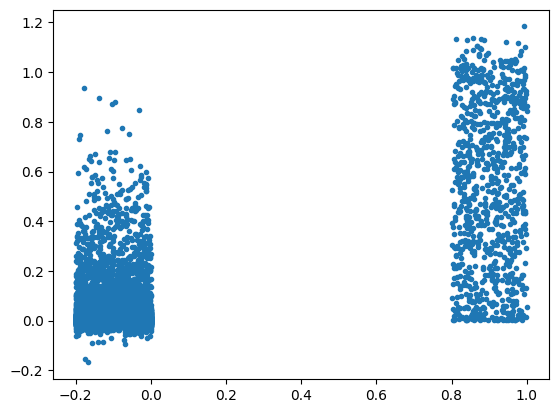

In [17]:
#%matplotlib notebook
import random
y_shuff = [x+(random.random()*.2-.2) for x in y_]
plt.plot(y_shuff,y_pred_,'.')

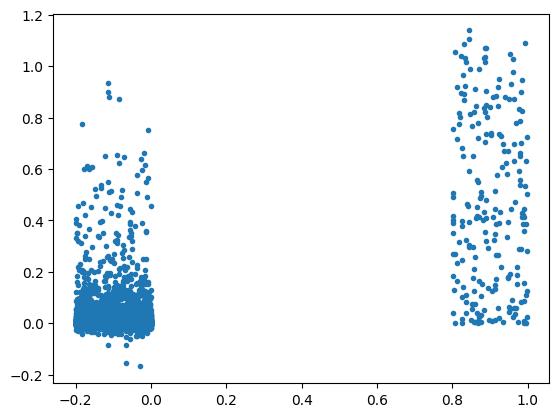

In [18]:
y_pred_test_a_ = cb_model.predict(X_test)
y_test_a_     = y_test

y_shuff_test = [x+(random.random()*.2-.2) for x in y_test_a_]
plt.plot(y_shuff_test,y_pred_test_a_,'.')

In [19]:
#Pick out indexes of false positives.  Where the label y_ is false but the prediction y_pred_ is true.
#data[:,fishy_index[0][0]]
fishy_index = np.where((y_<.4)&(y_pred_>.5))
data.loc[fishy_index[0][2],:]

output                                                 0
source                                          n:μερίζω
target                                         n:divided
sLang                                               na27
tLang                                                ylt
sourceCorpusPermutationsFrequencyRatio          0.010811
targetCorpusPermutationsFrequencyRatio          0.015152
sourceAlignmentMemoryFrequencyRatio                    0
targetAlignmentMemoryFrequencyRatio                    0
frequencyRatioCorpusFiltered                        0.25
frequencyRatioAlignmentMemoryFiltered                  0
sourceCorpusLemmaPermutationsFrequencyRatio          0.0
targetCorpusLemmaPermutationsFrequencyRatio          0.0
sourceAlignmentMemoryLemmaFrequencyRatio               0
targetAlignmentMemoryLemmaFrequencyRatio               0
lemmaFrequencyRatioCorpusFiltered                    0.0
lemmaFrequencyRatioAlignmentMemoryFiltered             0
ngramRelativeTokenDistance     

In [20]:
fishy_index

(array([ 10273,  11620,  15713,  18311,  23509,  25810,  33379,  33687,
         36810,  37890,  38701,  46249,  46486,  61096,  61189,  64727,
         68490,  68526,  81361,  88001,  88132,  94967,  94974,  98603,
        102245, 104327, 111719, 113428, 130995, 139372, 139926, 146897,
        149254, 154893, 168872, 170429, 184484, 185203, 185625, 192477,
        197138, 198962, 199203, 199565, 202244, 203695, 215913, 215934,
        217059, 218561, 230985, 236068, 236512, 242921, 252944, 264137,
        281249, 289320, 289334, 292611, 294532, 300240, 301768, 302663]),)

In [21]:
data.loc[fishy_index[0],["source","target"]]

,source,target
10273,n:αὐτός,n:them
11620,n:ὁ,n:the
15713,n:μερίζω,n:divided
18311,n:λαός,n:people
23509,n:ἐγώ,n:us
...,...,...
292611,n:ὁ,n:the
294532,n:φωνή,n:voice
300240,n:ὁ,n:the
301768,n:ὁ,n:the


In [22]:
#This shows the false negatives where the labels said true but the model said false.
fishy_low = np.where((y_>.4)&(y_pred_<.001))
#print(fishy_low[0][2])
data.loc[fishy_low[0][0],:]

output                                                      1
source                                           n:παραδίδωμι
target                                         n:delivered:up
sLang                                                    na27
tLang                                                     ylt
sourceCorpusPermutationsFrequencyRatio               0.001285
targetCorpusPermutationsFrequencyRatio               0.017544
sourceAlignmentMemoryFrequencyRatio                         0
targetAlignmentMemoryFrequencyRatio                         0
frequencyRatioCorpusFiltered                              1.0
frequencyRatioAlignmentMemoryFiltered                       0
sourceCorpusLemmaPermutationsFrequencyRatio               0.0
targetCorpusLemmaPermutationsFrequencyRatio               0.0
sourceAlignmentMemoryLemmaFrequencyRatio                    0
targetAlignmentMemoryLemmaFrequencyRatio                    0
lemmaFrequencyRatioCorpusFiltered                         0.0
lemmaFre

In [25]:
cb_model.save_model( cb_output_model_name )

In [26]:
#cb_model.save_model( "../catboost_save.cpp", format="cpp" )
#cb_model.save_model( "../catboost_save.py", format="python" )

In [27]:
#!pip install xgboost

In [28]:
import xgboost as xgb

In [29]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

In [30]:
#params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 2000
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
xg_model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=10 # Every ten rounds
)

[0]	validation-rmse:0.35162	train-rmse:0.35164
[10]	validation-rmse:0.04225	train-rmse:0.04076
[20]	validation-rmse:0.04020	train-rmse:0.03698
[30]	validation-rmse:0.04029	train-rmse:0.03575
[40]	validation-rmse:0.04010	train-rmse:0.03435
[50]	validation-rmse:0.03998	train-rmse:0.03319
[60]	validation-rmse:0.04006	train-rmse:0.03188
[70]	validation-rmse:0.04018	train-rmse:0.03055
[80]	validation-rmse:0.04022	train-rmse:0.02954
[90]	validation-rmse:0.04012	train-rmse:0.02870
[100]	validation-rmse:0.04022	train-rmse:0.02800
[110]	validation-rmse:0.04022	train-rmse:0.02711
[120]	validation-rmse:0.04032	train-rmse:0.02668
[130]	validation-rmse:0.04034	train-rmse:0.02602
[140]	validation-rmse:0.04033	train-rmse:0.02540
[150]	validation-rmse:0.04040	train-rmse:0.02484
[160]	validation-rmse:0.04044	train-rmse:0.02443
[170]	validation-rmse:0.04047	train-rmse:0.02381
[180]	validation-rmse:0.04058	train-rmse:0.02318
[190]	validation-rmse:0.04063	train-rmse:0.02249
[200]	validation-rmse:0.04063	t

[1670]	validation-rmse:0.04136	train-rmse:0.00442
[1680]	validation-rmse:0.04136	train-rmse:0.00440
[1690]	validation-rmse:0.04136	train-rmse:0.00438
[1700]	validation-rmse:0.04136	train-rmse:0.00437
[1710]	validation-rmse:0.04136	train-rmse:0.00433
[1720]	validation-rmse:0.04136	train-rmse:0.00431
[1730]	validation-rmse:0.04137	train-rmse:0.00429
[1740]	validation-rmse:0.04137	train-rmse:0.00425
[1750]	validation-rmse:0.04137	train-rmse:0.00424
[1760]	validation-rmse:0.04137	train-rmse:0.00423
[1770]	validation-rmse:0.04137	train-rmse:0.00422
[1780]	validation-rmse:0.04137	train-rmse:0.00420
[1790]	validation-rmse:0.04137	train-rmse:0.00420
[1800]	validation-rmse:0.04137	train-rmse:0.00420
[1810]	validation-rmse:0.04137	train-rmse:0.00420
[1820]	validation-rmse:0.04137	train-rmse:0.00420
[1830]	validation-rmse:0.04137	train-rmse:0.00420
[1840]	validation-rmse:0.04137	train-rmse:0.00420
[1850]	validation-rmse:0.04137	train-rmse:0.00420
[1860]	validation-rmse:0.04137	train-rmse:0.00420


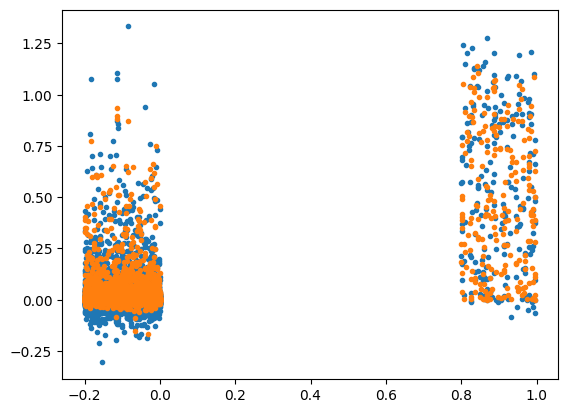

In [31]:
y_pred_test_b_ = xg_model.predict(dtest_reg)

plt.plot(y_shuff_test,y_pred_test_b_,'.')
plt.plot(y_shuff_test,y_pred_test_a_,'.')

In [32]:
xg_model.save_model(xg_output_model_name)